In [24]:
import pandas as pd
from hdr5 import HDR5
import matplotlib.pyplot as plt
import numpy as np

In [10]:
spikes_1 = pd.read_csv('spikes.csv', '\s+')
spikes_01 = pd.read_csv('spikes copy.csv', '\s+')

C:\Users\nilsv\AppData\Local\Temp\ipykernel_10280\1986606305.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  spikes_1 = pd.read_csv('spikes.csv', '\s+')
C:\Users\nilsv\AppData\Local\Temp\ipykernel_10280\1986606305.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  spikes_01 = pd.read_csv('spikes copy.csv', '\s+')


In [11]:
spikes_1[spikes_1['node_ids'] == 78]

,timestamps,population,node_ids
1,383.0,slice,78
2,346.0,slice,78
3,309.0,slice,78
4,269.0,slice,78


In [12]:
spikes_01[spikes_01['node_ids'] == 78]

,timestamps,population,node_ids
1,255.3,slice,78
2,292.6,slice,78
15,328.7,slice,78
17,365.0,slice,78
36,398.9,slice,78


In [13]:
f = HDR5('../sim1/bio_basic_features/network/bio_nodes.h5')
f.get_positions()

array([[1000.        ,    0.        ,    0.        ],
       [ 309.01699437,  951.0565163 ,    0.        ],
       [-809.01699437,  587.78525229,    0.        ],
       [-809.01699437, -587.78525229,    0.        ],
       [ 309.01699437, -951.0565163 ,    0.        ]])

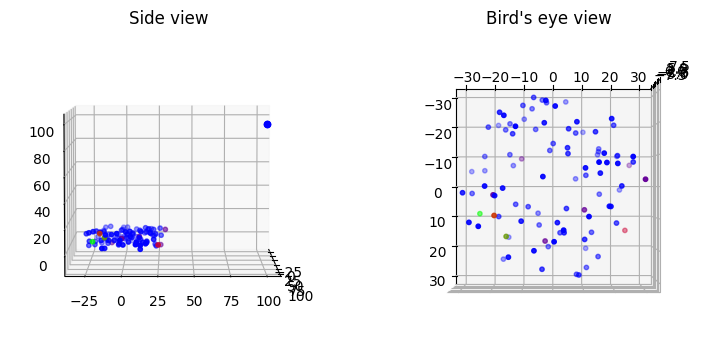

In [86]:
def plot_positions(pos,ax,labels):
    # Do plot a verification for each of these helper functions

    ax.scatter(x,y,z, marker='.', s=3)

    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])

def plot_activity(nodes_dir, electrodes_dir, spikes_dir):
    node_pos = HDR5(nodes_dir).get_positions()
    n_spikes = np.zeros((np.shape(node_pos)[0]))
    elec_pos = pd.read_csv(electrodes_dir, sep=' ')
    spikes = pd.read_csv(spikes_dir, sep=' ')
    for ind in spikes.index:
        n_spikes[spikes['node_ids'][ind]] += 1

    fig, ax = plt.subplots(1,2,figsize=(9,12), subplot_kw={'projection':'3d'})
    
    ax[0].scatter(list(node_pos[:,0]), list(node_pos[:,2]), list(node_pos[:,1]), marker='o', s=10, cmap='brg', c=n_spikes)
    ax[0].scatter(elec_pos['pos_x'].to_list(), elec_pos['pos_z'].to_list(), elec_pos['pos_y'].to_list(), color = 'b', s=20)
    ax[0].set_title('Side view')
    ax[0].view_init(elev=5., azim=0)

    ax[1].scatter(list(node_pos[:,0]), list(node_pos[:,2]), list(node_pos[:,1]), marker='o', s=10, cmap='brg', c=n_spikes)
    ax[0].scatter(elec_pos['pos_x'].to_list(), elec_pos['pos_z'].to_list(), elec_pos['pos_y'].to_list(), color = 'b', s=20)
    ax[1].set_title('Bird\'s eye view')
    ax[1].view_init(elev=90., azim=0)

    plt.show()

    return elec_pos['pos_x'].to_list()

t = plot_activity('network/slice_nodes.h5', '../sim1/biophys_components/stimulations/orig485058595_0000.csv', 'spikes.csv')